In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


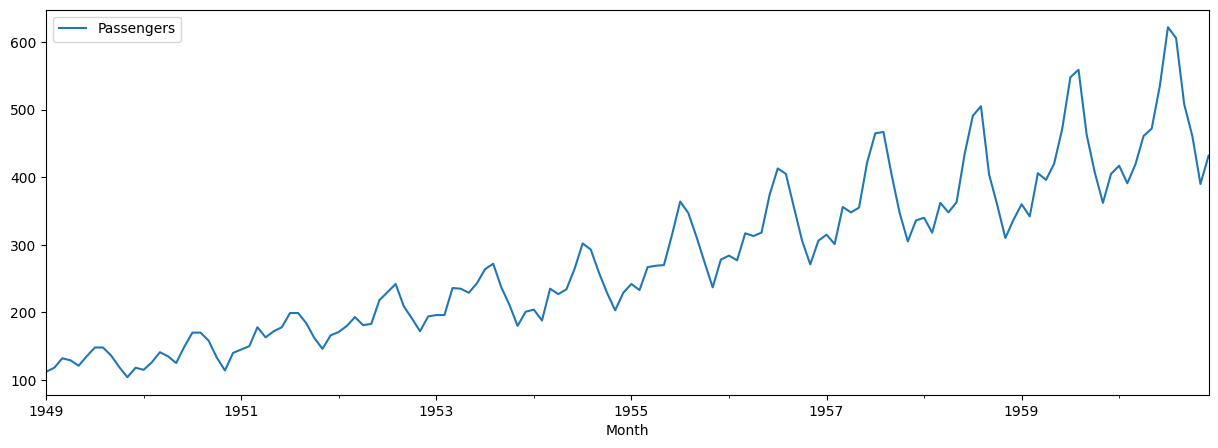

In [5]:
df.plot(figsize=(15, 5));

In [6]:
df['1stdiff'] = df['Passengers'].diff()

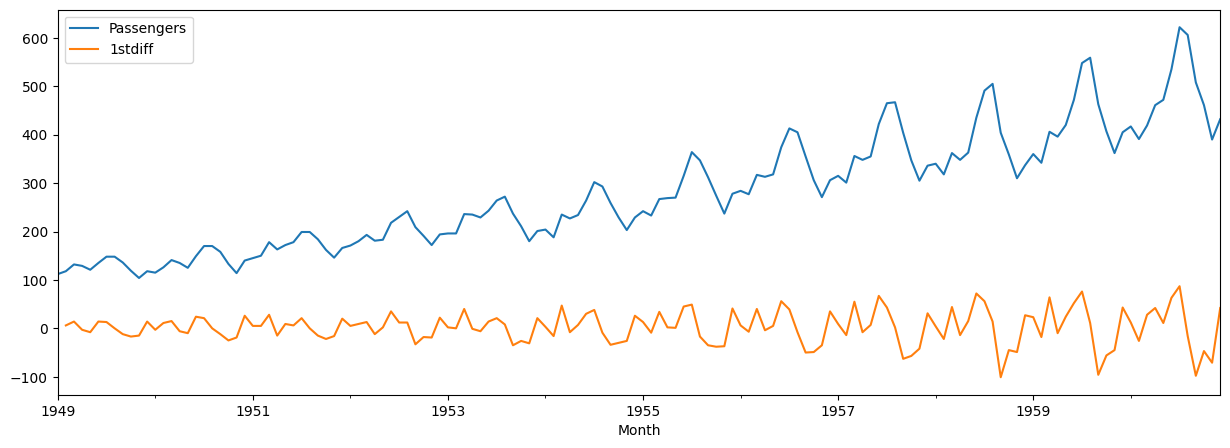

In [7]:
df.plot(figsize=(15, 5));

In [8]:
df['LogPassengers'] = np.log(df['Passengers'])

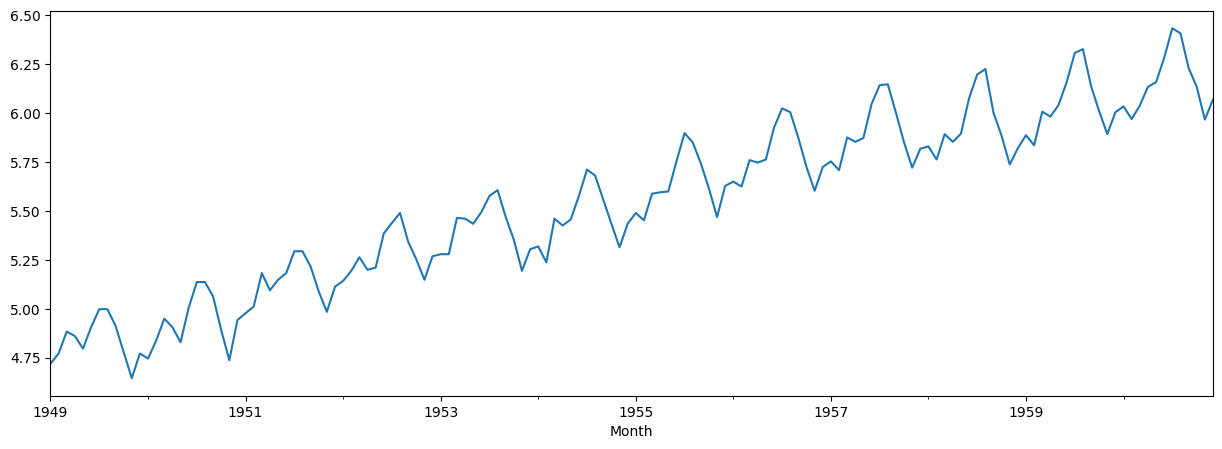

In [9]:
df['LogPassengers'].plot(figsize=(15, 5));

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [15]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [12]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [13]:
arima_result = arima.fit()

In [16]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1])

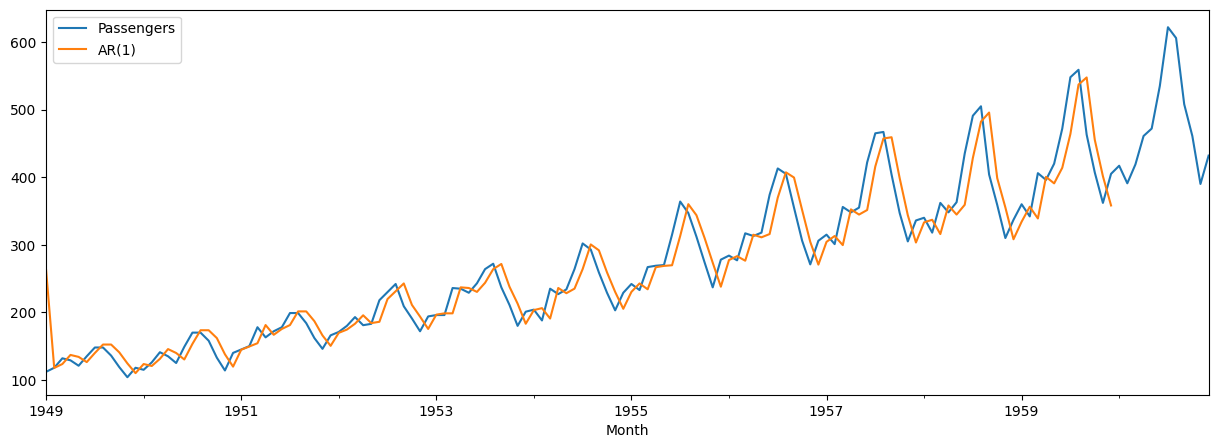

In [17]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [18]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

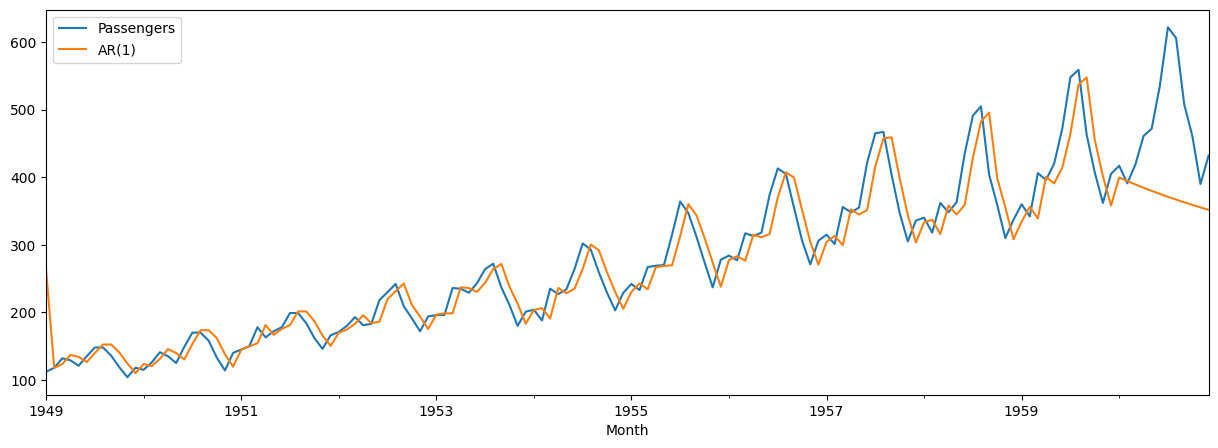

In [19]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [20]:
# Explore prediction result further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [21]:
# Confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121348
1960-06-01,239.373403,511.217438
1960-07-01,226.768868,515.201639
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764225
1960-10-01,195.386337,522.649551


In [22]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

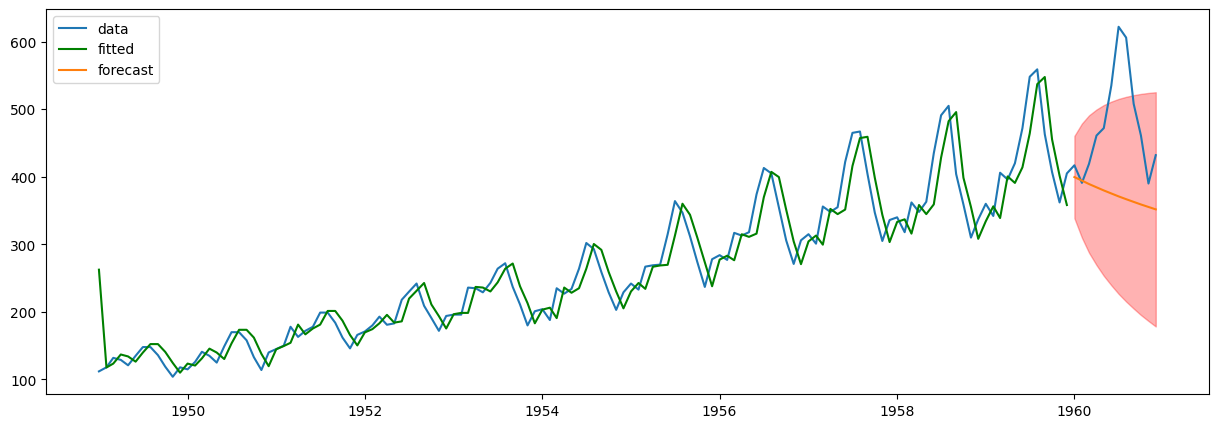

In [23]:
plot_fit_and_forecast(arima_result)

/Users/jmahe/projects/python/finance/jupyter-m4/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jmahe/projects/python/finance/jupyter-m4/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


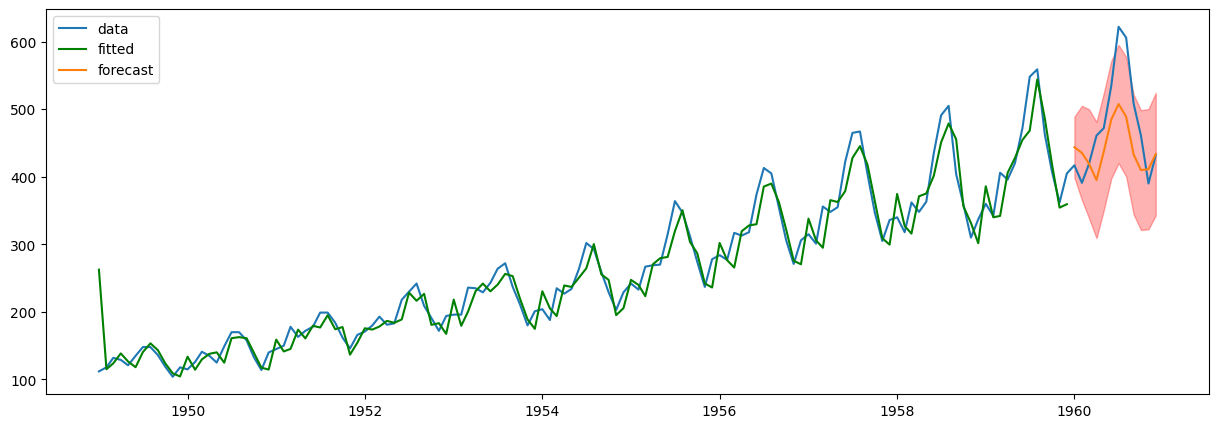

In [24]:
arima = ARIMA(train['Passengers'], order=(10,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/Users/jmahe/projects/python/finance/jupyter-m4/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


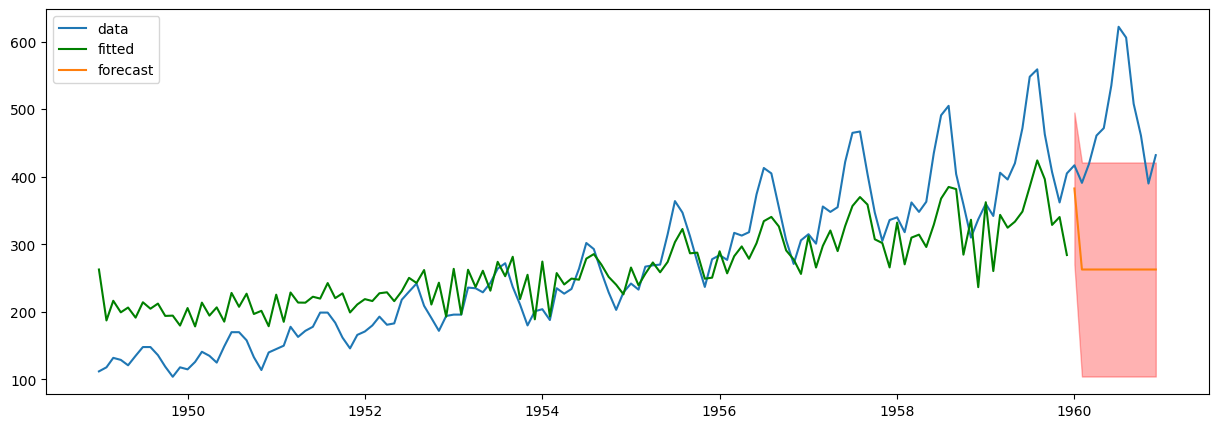

In [25]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [26]:
df['Log1stDiff'] = df['LogPassengers'].diff()

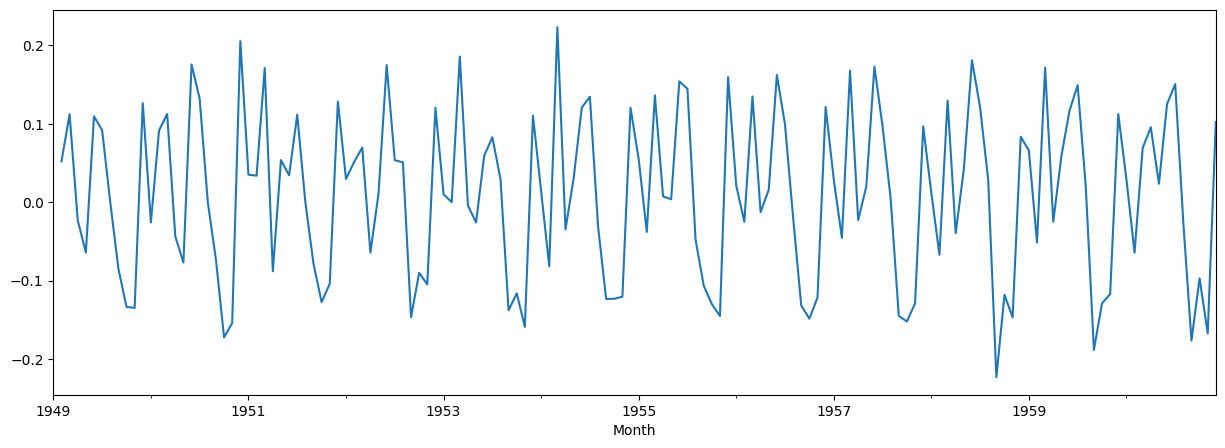

In [27]:
df['Log1stDiff'].plot(figsize=(15, 5));

In [28]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

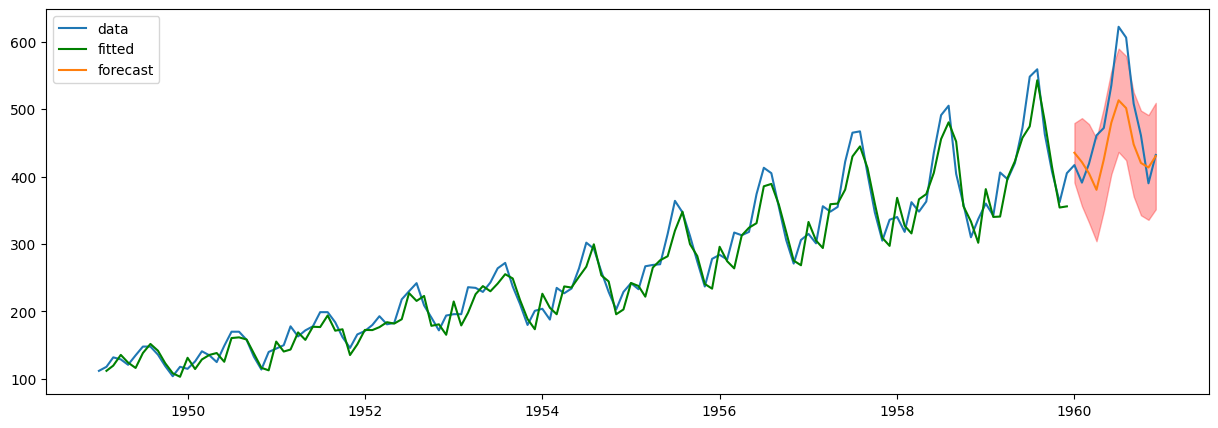

In [30]:
def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1], typ='levels')

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

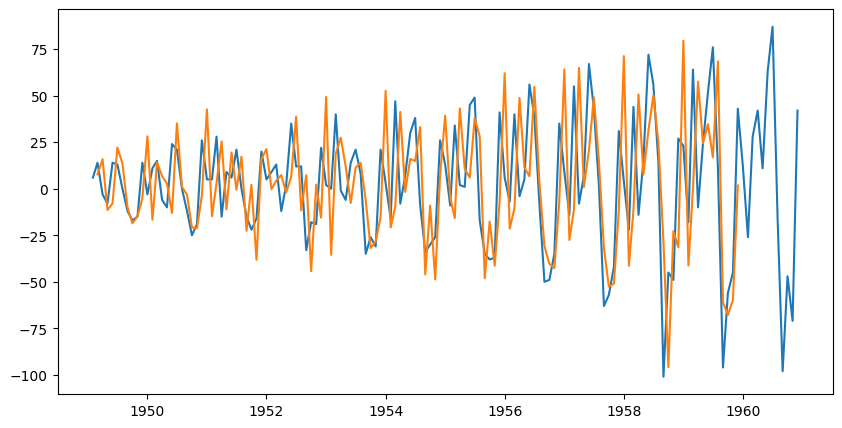

In [36]:
def plot_difference(result, d, col='Passengers'):
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    diff = df[col].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(diff, label='true 1st difference')
    ax.plot(train_pred.diff(), label='fitted 1st difference')

plot_difference(arima_result_811, 1)

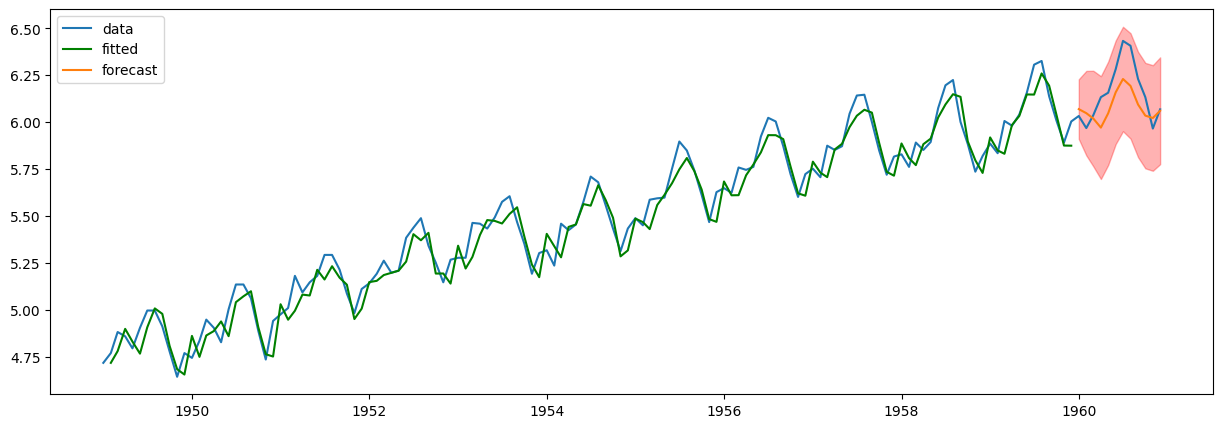

In [31]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

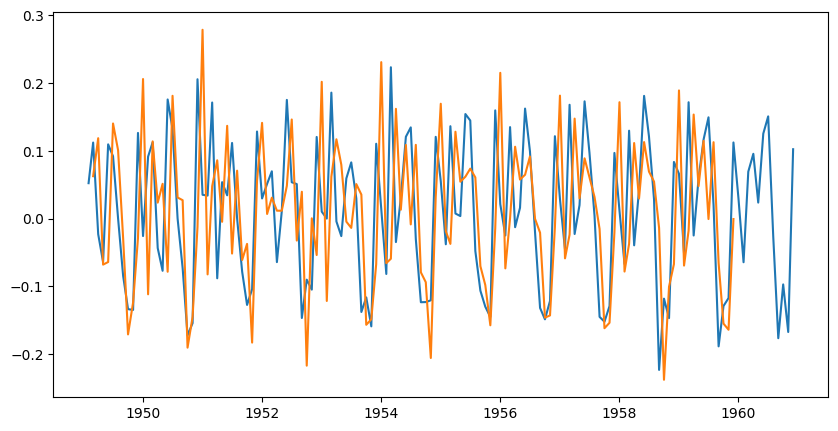

In [37]:
plot_difference(arima_result_log811, 1, col='LogPassengers')

/Users/jmahe/projects/python/finance/jupyter-m4/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


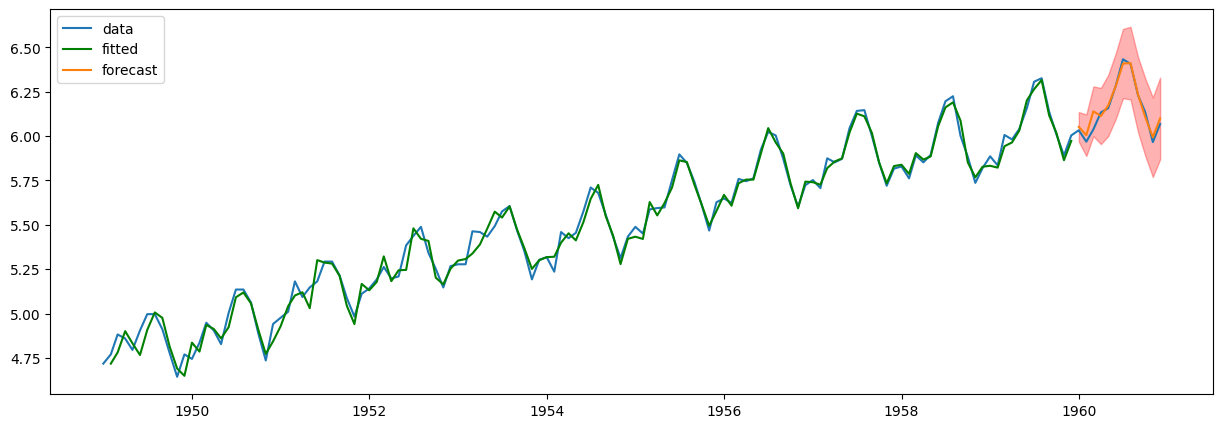

In [38]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [39]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [41]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.064585246504606
ARIMA(8,1,1) logged: 61.599679988863954
ARIMA(12,1,0) logged: 16.118577609534167
